In [1]:
#Llamar al dataloader
%run DataLoader.ipynb

In [2]:
#Verificamos que el dataset no tenga ningúna fila que contenga la cadena de texto 'NaN'
#ya que vamos a tener que reemplazar los valores nulos por ese string para que el análisis sea bueno
len(dataset[(dataset.keyword.str.contains('NaN')) |\
        (dataset.location.str.contains('NaN')) |\
        (dataset.text.str.contains('NaN'))])

#Hacemos un fillna porque a la hora de hacer group by, buscar duplicados o hacer un pivot
#los NaN generan un mal resultado

grupo = dataset.fillna(value='NaN')

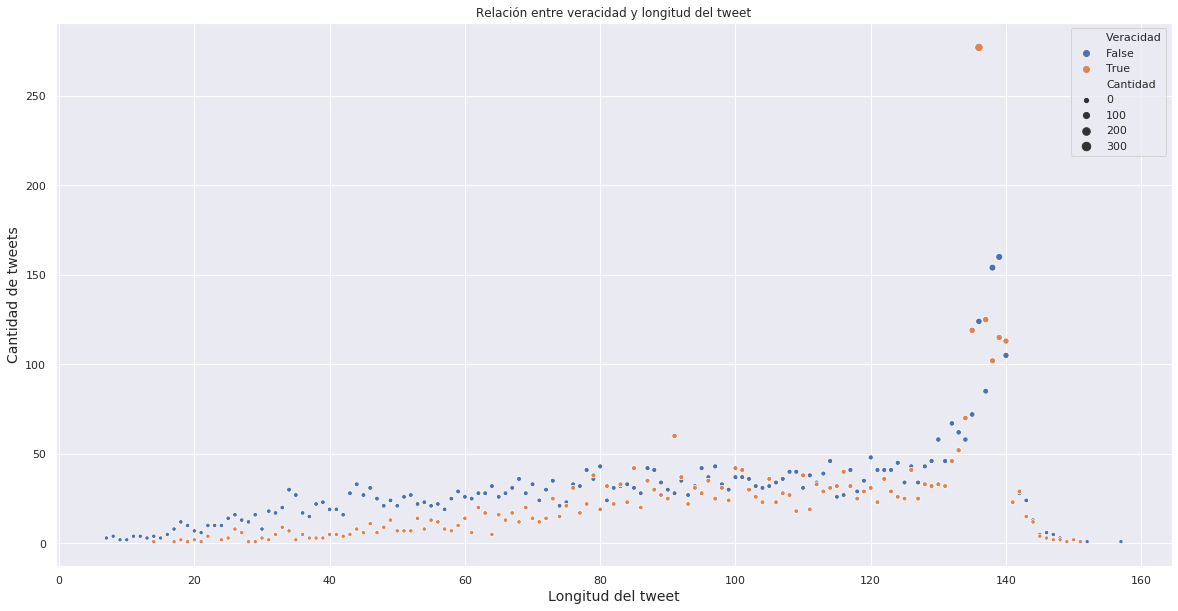

In [3]:
#Tweets por longitud y veracidad
grupo = dataset.groupby(['longitud', 'target']).agg({'target':['count']})
grupo.columns = ['Cantidad']

grupo = grupo.reset_index()
grupo = grupo.rename(columns={'target':'Veracidad'})

sns.set()
fig, ax = plt.subplots()
ax = sns.scatterplot(x = 'longitud', y = 'Cantidad', data = grupo, hue = 'Veracidad', size = 'Cantidad')
ax.set_ylabel('Cantidad de tweets',fontsize=14)
plt.xlabel("Longitud del tweet",fontsize=14)
ax.set_title('Relación entre veracidad y longitud del tweet')
fig = ax.get_figure()
#fig.savefig('figure.png')

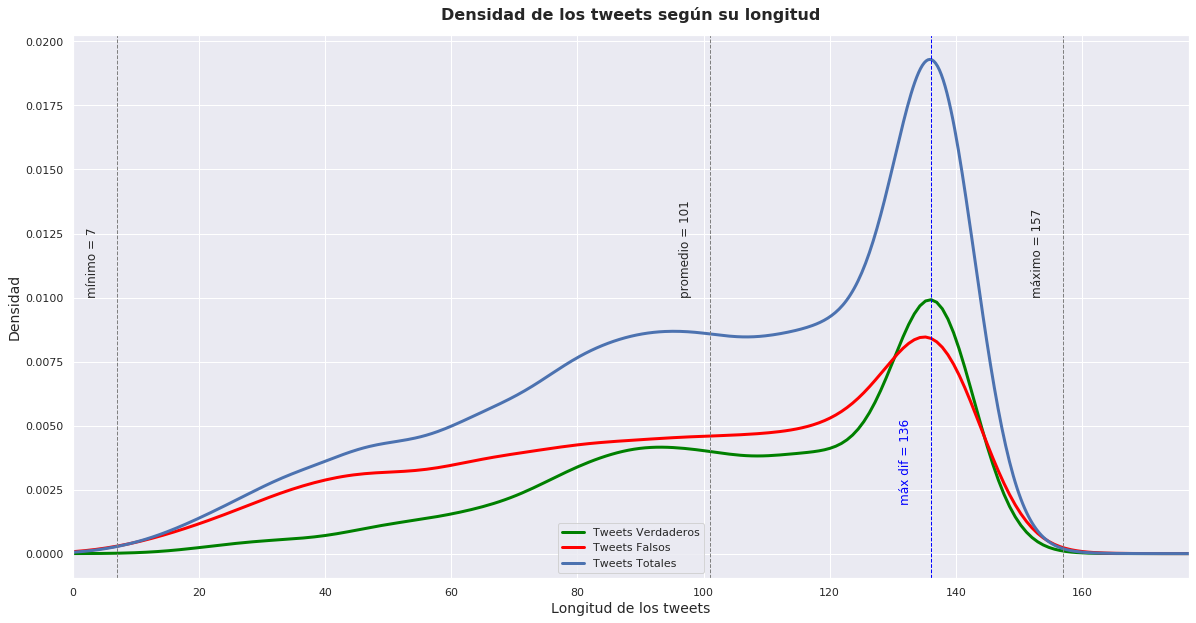

In [6]:
from scipy.stats import gaussian_kde



tweet_len_true = dataset.loc[(dataset['target']),'longitud']
tweet_len_false = dataset.loc[(dataset['target']==False),'longitud']

tweet_totals = dataset['longitud'].count()
tweet_true_count = tweet_len_true.count()
tweet_false_count = tweet_len_false.count()

kernel_true = gaussian_kde(tweet_len_true)
kernel_false = gaussian_kde(tweet_len_false)
x_lim = dataset['longitud'].max()+20
X = np.linspace(0,x_lim,200)
Y_true = kernel_true.evaluate(X)*tweet_true_count/tweet_totals
Y_false = kernel_false.evaluate(X)*tweet_false_count/tweet_totals

fig, ax = plt.subplots()

ax.plot(X, Y_true , label='Tweets Verdaderos', color = 'green', linewidth=3)
ax.plot(X, Y_false , label='Tweets Falsos', color = 'red', linewidth=3)
dataset['longitud'].plot(kind='kde', ax=ax, label='Tweets Totales', linewidth=3, xlim=(0, x_lim))

plt.xlabel('Longitud de los tweets',fontsize=14)
plt.ylabel('Densidad',fontsize=14)
plt.title('Densidad de los tweets según su longitud',fontsize=16,fontweight='bold', pad = 15)

# calculo las estadísticas pedidas sobre el total de los tweets
min_len = dataset['longitud'].min()
mean_len = dataset['longitud'].mean()
max_len = dataset['longitud'].max()

# calculo el punto donde hay mayor diferencia entre los 
# tweets verdaderos y los falsos
max_diff = (tweet_len_true.value_counts()-tweet_len_false.value_counts()).dropna().abs().idxmax()

ax.axvline(mean_len, color='grey', linestyle='--', linewidth=1)
ax.axvline(min_len, color='grey', linestyle='--', linewidth=1)
ax.axvline(max_len, color='grey', linestyle='--', linewidth=1)
ax.axvline(max_diff, color='blue', linestyle='--', linewidth=1)

plt.text(min_len - 5 , ax.get_ylim()[1]/2, 'mínimo = %d' %min_len, rotation = 90, fontsize = 12)
plt.text(mean_len - 5 , ax.get_ylim()[1]/2, 'promedio = %d' %mean_len, rotation = 90, fontsize = 12)
plt.text(max_len - 5 , ax.get_ylim()[1]/2, 'máximo = %d' %max_len, rotation = 90, fontsize = 12)

plt.text(max_diff- 5 , ax.get_ylim()[1]/10, 'máx dif = %d' %max_diff, rotation = 90, fontsize = 12, color = 'blue')

plt.legend()